## Ejercicio: Arboles de decision

<br> 1) Crear un DataFrame (df) con la base de datos Titanic.csv:<br>

<br> a) ¿Existen valores NANs en el df? ¿En qué variables aparecen? ¿De qué tipo son esas variables? (categóricas, continuas).
Una opción sería eliminar los datos donde se presentan NANs. Otra opción es reemplazar los NANs por valores razonables y no perder ese dato. ¿Cómo completaría los NANs presentes en variables que indican categoría?
¿Y en los casos de las variables continuas?
Realizar los cambios necesarios para obtener un df sin NANs y sin eliminar ninguna fila. <br>

In [36]:
import pandas as pd

df_titanic = pd.read_csv('Titanic.csv')


#Veo los atributos que tienen NaNs y cuantos tienen
cant_pasajeros = df_titanic['PassengerId'].size
for atribute in df_titanic.columns:
    if df_titanic[atribute].isnull().sum() != 0:
        print('El atributo {0} tiene {1} valores NaN'.format(atribute, df_titanic[atribute].isnull().sum()))


El atributo Age tiene 263 valores NaN
El atributo Fare tiene 1 valores NaN
El atributo Cabin tiene 1014 valores NaN
El atributo Embarked tiene 2 valores NaN


In [37]:
#Limpio el df, asignando valores a los NaN.

#Atributo Cabin:
print('Hay en total 1014 NaN en cabin, no tiene sentido considerarlo como atributo valioso ya que el %{0} de los datos estan faltantes.'.format(1014/cant_pasajeros * 100))
df_titanic = df_titanic.drop('Cabin', axis=1)

Hay en total 1014 NaN en cabin, no tiene sentido considerarlo como atributo valioso ya que el %77.46371275783041 de los datos estan faltantes.


In [38]:
#Atributo Age: Busco la edad promedio de los hombres y de las mujeres y lleno los NaN correspondientes con este promedio.

edad_prom_hombres = df_titanic[(df_titanic['Age'].isnull() == False) & (df_titanic['Sex'] == 'male')].Age.mean()
edad_prom_mujeres = df_titanic[(df_titanic['Age'].isnull() == False) & (df_titanic['Sex'] == 'female')].Age.mean()
df_titanic.iloc[df_titanic[df_titanic['Sex']=='male'].index] = df_titanic.iloc[df_titanic[df_titanic['Sex']=='male'].index].fillna(value={'Age':edad_prom_hombres})
df_titanic.iloc[df_titanic[df_titanic['Sex']=='female'].index] = df_titanic.iloc[df_titanic[df_titanic['Sex']=='female'].index].fillna(value={'Age':edad_prom_mujeres})
print('Busco la edad promedio de los pasajeros segun el sexo y lleno los NaN de cada sexo con el promedio. Edad promedio de mujeres: {0}. Edad promedio de hombres: {1}'.format(edad_prom_mujeres, edad_prom_hombres))

Busco la edad promedio de los pasajeros segun el sexo y lleno los NaN de cada sexo con el promedio. Edad promedio de mujeres: 28.68708762886598. Edad promedio de hombres: 30.58522796352584


In [39]:
#Atributo Fare: Al ser uno solo, lo lleno con la tarifa promedio
df_titanic.iloc[df_titanic[df_titanic.Fare.isnull()==True].index] = df_titanic.iloc[df_titanic[df_titanic.Fare.isnull()==True].index].fillna(value={'Fare':df_titanic.Fare.mean()})
#Atributo Embarked: Al ser solo dos valores, me fijo donde embarco el promedio y se lo asigno a estos NaN
df_titanic.iloc[df_titanic[df_titanic.Embarked.isnull()==True].index] = df_titanic.iloc[df_titanic[df_titanic.Embarked.isnull()==True].index].fillna(value={'Embarked':df_titanic.Embarked.describe().top})

In [40]:
print('Luego de esta limpieza no hay mas valores NaN en los datos. \n{0}'.format(df_titanic.isnull().sum()))

Luego de esta limpieza no hay mas valores NaN en los datos. 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<br> b) Crear una variable $X$ con las columnas Pclass, Sex, Age, Fare, Embarked y una variable $y$ con las columna Survived. <br>

In [41]:
X = df_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
Y = df_titanic.Survived

<br> c) Crear $X_{train}, X_{test}, y_{train}, y_{test}$. <br>

In [46]:
#Como mas adelante pide que use el DecisionTreeClassifier, este me pide que los valores que tomen los atributos no sean string, debo preprocesar antes Sex y Embarked.
#La libreria Preprocessing de sklearn me facilita esto
from sklearn.preprocessing import LabelEncoder
# con esta funcion puedo ver si alguna columna son string --> isinstance(df_titanic.Sex[0],str)
le = LabelEncoder()
le.fit(X.Sex)
sex_encoded = le.transform(X.Sex)
X = X.drop('Sex', axis=1).iloc[:]
X['Sex'] = sex_encoded
le.classes_

array(['female', 'male'], dtype=object)

In [34]:
#Exactamente lo mismo para embarked
le.fit(X.Embarked)
emb_encoded = le.transform(X.Embarked)
X = X.drop('Embarked', axis=1).iloc[:]
X['Embarked'] = emb_encoded
le.classes_


array(['C', 'Q', 'S'], dtype=object)

In [9]:
#otra forma de hacer esto para todas las columnas al mismo tiempo es:
columnas_no_numericas=["Sex","Embarked"]
for col in (df_titanic[columnas_no_numericas]).columns:
    df_titanic[col] = pd.Categorical(df_titanic[col] ).codes
X = df_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
Y = df_titanic.Survived

In [10]:
X.head() #observar que las variables de Sex y Embarked ahora son numericas y no strings


,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2


In [11]:
from sklearn.model_selection import train_test_split
random_seed = 1234
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state=random_seed)

<br> d) Realizar una clasificación con el algoritmo DecisionTreeClassifier. <br>

In [12]:
Xtrain.head()

,Pclass,Sex,Age,Fare,Embarked
718,3,1,30.585228,15.5000,1
868,3,1,30.585228,9.5000,2
801,2,0,31.000000,26.2500,2
422,3,1,29.000000,7.8750,2
207,3,1,26.000000,18.7875,0


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(Xtrain, Ytrain)
ypred = clf.predict(Xtest)

<br> e) Evaluar la exactitud, la precisión, recall y $F_1$-score de la clasifiación realizada.<br>

In [14]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Ytest, ypred)*100))
print('La precision del modelo fue : %{0}'.format(precision_score(Ytest, ypred)*100)) #La precision es la capacidad del modelo de NO clasificar una muestra como positiva si es negativa (falsos positivos))
print('El f1-score es: {0}'.format(f1_score(Ytest, ypred))) #El f1 score es un promedio pesado entre la precision y el recall. Donde recall es la capacidad del modelo de encontrar todas las muestras positivas.

La exactitud del modelo fue de : %82.06106870229007
La precision del modelo fue : %74.11764705882354
El f1-score es: 0.7283236994219654


<br> f) Realizar la matriz de confusión. Utilizar la función heatmap dentro de la librería seaborn para plotear la matriz de confusión. <br>

In [15]:
#Una matriz de confusion muestra la cantidad de falsos positivos y falsos negativos que obtuvo el modelo.
#En la horizontal se encuentran los valores que son reales, en este caso muertos (0) fueron 150 + 21 = 171 y vivos (1) fueron 24 + 64 = 88.
#En la vertical se encuentran los valores que el modelo obtuvo 150 + 24 = 174 muertos y 21 + 64 = 85 vivos. 
#En donde coincide el 1 vertical con el 0 horizontal ( y respectivamente el 0 vertical con el 1 horizontal ) se encuentran la cantidad de falsos positivos y falsos negativos.
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Ytest, ypred)
print('El modelo predijo que 21 de los 171 muertos sobrevivieron, y que 24 de los 88 sobrevivientes murieron.')
sns.heatmap(cm, annot=True)


El modelo predijo que 21 de los 171 muertos sobrevivieron, y que 24 de los 88 sobrevivientes murieron.


<br> g) Dentro de DecisionTreeClassifier está la opción de crear clasificadores con una cantidad de niveles establecida o considerando solo cierta cantidad de atributos. Realizar una nueva clasificación experimentando con distintas opciones de las características: max depth y max features.  Comparar la nueva clasificación con la anterior.<br>

La exactitud del modelo fue de : %87.78625954198473
La precision del modelo fue : %84.14634146341463
El f1-score es: 0.8117647058823529


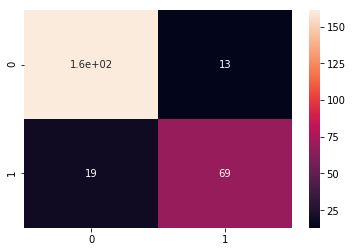

In [16]:
#Modelo creado con una profundidad de 3
clf_dp3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_dp3.fit(Xtrain, Ytrain)
ypred_dp3 = clf_dp3.predict(Xtest)

print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Ytest, ypred_dp3)*100))
print('La precision del modelo fue : %{0}'.format(precision_score(Ytest, ypred_dp3)*100)) 
print('El f1-score es: {0}'.format(f1_score(Ytest, ypred_dp3)))
sns.heatmap(confusion_matrix(Ytest, ypred_dp3), annot=True)

La exactitud del modelo fue de : %83.96946564885496
La precision del modelo fue : %73.95833333333334
El f1-score es: 0.7717391304347826


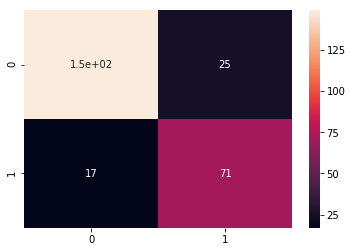

In [17]:
#Modelo creado con profundidad de 4 y maximo de atributos por split 2
clf_dp4_s2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=2)
clf_dp4_s2.fit(Xtrain, Ytrain)
ypred_dp4_s2 = clf_dp4_s2.predict(Xtest)

print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Ytest, ypred_dp4_s2)*100))
print('La precision del modelo fue : %{0}'.format(precision_score(Ytest, ypred_dp4_s2)*100)) 
print('El f1-score es: {0}'.format(f1_score(Ytest, ypred_dp4_s2)))
sns.heatmap(confusion_matrix(Ytest, ypred_dp4_s2), annot=True)

La exactitud del modelo fue de : %85.87786259541986
La precision del modelo fue : %81.48148148148148
El f1-score es: 0.7810650887573963


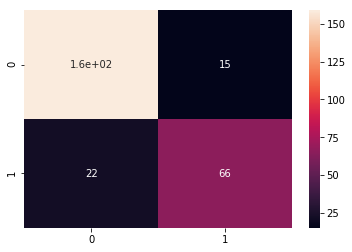

In [18]:
#Modelo creado con profundidad de 3 y maximo de atributos por split 2
clf_dp3_s2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2)
clf_dp3_s2.fit(Xtrain, Ytrain)
ypred_dp3_s2 = clf_dp3_s2.predict(Xtest)

print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Ytest, ypred_dp3_s2)*100))
print('La precision del modelo fue : %{0}'.format(precision_score(Ytest, ypred_dp3_s2)*100)) 
print('El f1-score es: {0}'.format(f1_score(Ytest, ypred_dp3_s2)))
sns.heatmap(confusion_matrix(Ytest, ypred_dp3_s2), annot=True)

Se nota que a medida que uno limita la cantidad de features por split y la profundidad del arbol encuentra un modelo mas general, que ajusta mejor a los datos de test.

## Ejercicio: Bosques aleatorios.
<br> 2) Crear un DataFrame (df) con la base de datos $\textbf{iris}$: <br>



In [19]:
from sklearn import datasets

data_iris = datasets.load_iris() 
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<br> a) Crear $X_{train}, X_{test}, y_{train}, y_{test}$.<br>

In [20]:
random_seed_rf = 1
X_train, X_test, Y_train, Y_test = train_test_split(df_iris, data_iris.target, test_size=0.2, random_state=random_seed_rf)

<br> b) Realizar una clasificación con el algoritmo $\textbf{RandomForestClassifier}$.<br>

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy', random_state=random_seed, max_features=2)
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)

<br> c) Evaluar la exactitud, la precisión, recall y $F_1$-score de la clasifiación realizada. Realizar la matriz de confusión. Utilizar la función $\textbf{heatmap}$ dentro de la librería $\textbf{seaborn}$ para plotear la matriz de confusión.<br>

La exactitud del modelo fue de : %96.66666666666667


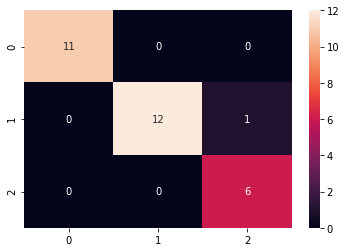

In [22]:
print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Y_test, y_pred_rf)*100))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True)

<br> e) Dentro de $\textbf{RandomForestClassifier}$ está la opción de crear cierta cantidad de arboles para el bosque y/o considerando solo cierta cantidad de niveles de cada árbol.<br> 
Realizar una nueva clasificación experimentando con distintas opciones de las características: $\textbf{n estimators}$ y $\textbf{max depth}$.  Comparar la nueva clasificación con la anterior.<br>

La exactitud del modelo fue de : %96.66666666666667


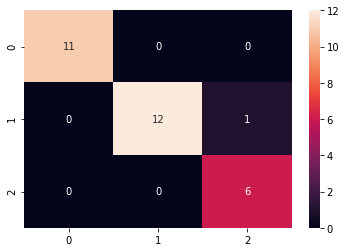

In [23]:
#Random forests con arboles de maxima profundidad 3
clf_rf_3dp = RandomForestClassifier(criterion='entropy', max_depth=3, max_features=2)
clf_rf_3dp.fit(X_train, Y_train)
y_pred_rf_3dp = clf_rf_3dp.predict(X_test)
print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Y_test, y_pred_rf_3dp)*100))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf_3dp), annot=True)

La exactitud del modelo fue de : %96.66666666666667


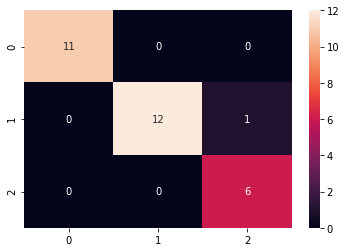

In [24]:
#Random forests con arboles de maxima profundidad 2 y 2 arboles
clf_rf_2dp_2tr = RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=2, max_features=2)
clf_rf_2dp_2tr.fit(X_train, Y_train)
y_pred_rf_2dp_2tr = clf_rf_2dp_2tr.predict(X_test)
print('La exactitud del modelo fue de : %{0}'.format(accuracy_score(Y_test, y_pred_rf_2dp_2tr)*100))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf_2dp_2tr), annot=True)

La exactitud del modelo fue de: %96.66666666666667


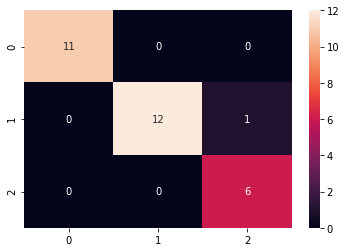

In [25]:
#Pruenbo con un modelo de un arbol de decision singular
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2)
clf_dt.fit(X_train, Y_train)
y_pred_dt = clf_dt.predict(X_test)
print('La exactitud del modelo fue de: %{0}'.format(accuracy_score(Y_test, y_pred_dt)*100))
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot=True)